# cpa01

This dataset contains data about the House Price Index (HPI), which is a value measuring the change of single-family house prices.

https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('HPI_master.csv')
df

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.93,100.98
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.33,100.93
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.71,101.00
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.33,101.37
...,...,...,...,...,...,...,...,...,...,...
118115,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2020,4,185.46,181.28
118116,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2021,1,189.00,196.98
118117,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2021,2,194.86,192.58
118118,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2021,3,199.61,198.80


In [3]:
df['place_name'].unique()

array(['East North Central Division', 'East South Central Division',
       'Middle Atlantic Division', 'Mountain Division',
       'New England Division', 'Pacific Division',
       'South Atlantic Division', 'West North Central Division',
       'West South Central Division', 'United States', 'Abilene, TX',
       'Akron, OH', 'Albany, GA', 'Albany-Lebanon, OR',
       'Albany-Schenectady-Troy, NY', 'Albuquerque, NM', 'Alexandria, LA',
       'Allentown-Bethlehem-Easton, PA-NJ', 'Altoona, PA', 'Amarillo, TX',
       'Ames, IA', 'Anaheim-Santa Ana-Irvine, CA (MSAD)', 'Anchorage, AK',
       'Ann Arbor, MI', 'Anniston-Oxford, AL', 'Appleton, WI',
       'Asheville, NC', 'Athens-Clarke County, GA',
       'Atlanta-Sandy Springs-Alpharetta, GA',
       'Atlantic City-Hammonton, NJ', 'Auburn-Opelika, AL',
       'Augusta-Richmond County, GA-SC',
       'Austin-Round Rock-Georgetown, TX', 'Bakersfield, CA',
       'Baltimore-Columbia-Towson, MD', 'Bangor, ME',
       'Barnstable Town, MA',

In [4]:
df.describe()

,yr,period,index_nsa,index_sa
count,118120.000000,118120.000000,118067.000000,38992.000000
mean,2003.092017,2.630410,168.331105,187.238424
std,11.290616,1.439587,84.205704,75.844996
min,1975.000000,1.000000,18.500000,70.640000
25%,1995.000000,2.000000,107.560000,127.707500
50%,2004.000000,3.000000,155.690000,177.710000
75%,2013.000000,4.000000,204.765000,224.270000
max,2021.000000,12.000000,1032.850000,740.230000


<AxesSubplot:>

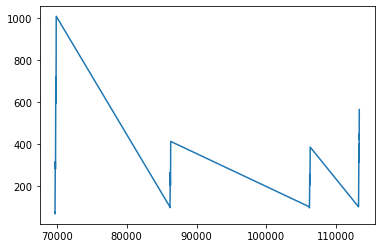

In [5]:
mass_hdf = df[df['place_name'] == "Massachusetts"]
mass_hdf['index_nsa'].plot()

(array([170.,  33.,  28.,  69., 156.,  99.,  36.,   9.,   7.,  13.]),
 array([ 94.15 , 119.476, 144.802, 170.128, 195.454, 220.78 , 246.106,
        271.432, 296.758, 322.084, 347.41 ]),
 <BarContainer object of 10 artists>)

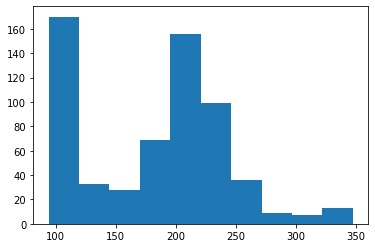

In [6]:
ne_hdf = df[df['place_name'] == 'New England Division']
plt.hist(ne_hdf['index_sa'],bins=10)

# Question 1: What are the top 20 places with the highest average seasonally adjusted HPI?

In [7]:
#groups the dataframe by the place name, frequency, year, and cycle period 
hdf = df.groupby(['place_name'])
#gets the mean of values from each location
hdf = hdf['index_sa'].agg(np.mean)
hdf = hdf.sort_values(ascending=False)
hdf.head(20)

place_name
Salt Lake City, UT                                 282.664597
Portland-Vancouver-Hillsboro, OR-WA                278.140121
Denver-Aurora-Lakewood, CO                         274.904516
Oregon                                             267.660484
Colorado                                           266.314234
District of Columbia                               265.857984
Utah                                               263.640887
Montana                                            262.982661
Austin-Round Rock-Georgetown, TX                   257.499556
Wyoming                                            245.741492
Miami-Miami Beach-Kendall, FL (MSAD)               244.083978
San Francisco-San Mateo-Redwood City, CA (MSAD)    239.551048
Seattle-Bellevue-Kent, WA (MSAD)                   235.201653
Colorado Springs, CO                               233.169274
Boise City, ID                                     229.614597
San Jose-Sunnyvale-Santa Clara, CA                 228.2920

# Question 2: How does the seasonally adjusted HPI change over the years for each US region?

In [8]:
#gathers only the monthly hpi values 
hdf_temp = df[df['frequency'] == 'monthly']
region_hdf = hdf_temp[hdf_temp['place_name'].str.contains('Division')]
#dataframe containing data from division regions, not individual states
region_hdf

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.93,100.98
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.33,100.93
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.71,101.00
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.33,101.37
...,...,...,...,...,...,...,...,...,...,...
3343,traditional,purchase-only,monthly,USA or Census Division,West South Central Division,DV_WSC,2021,8,361.07,356.74
3344,traditional,purchase-only,monthly,USA or Census Division,West South Central Division,DV_WSC,2021,9,366.99,363.27
3345,traditional,purchase-only,monthly,USA or Census Division,West South Central Division,DV_WSC,2021,10,367.96,366.33
3346,traditional,purchase-only,monthly,USA or Census Division,West South Central Division,DV_WSC,2021,11,371.78,370.90


In [9]:
hpi_column = 'index_sa' 
region_hdf = pd.pivot_table(region_hdf, values = hpi_column, index = ['yr'], columns = ['place_name'])
region_hdf

place_name,East North Central Division,East South Central Division,Middle Atlantic Division,Mountain Division,New England Division,Pacific Division,South Atlantic Division,West North Central Division,West South Central Division
yr,,,,,,,,,
1991,101.731667,101.159167,99.565000,101.368333,99.415000,100.128333,100.604167,100.764167,100.668333
1992,106.033333,104.838333,101.095833,107.499167,98.113333,100.175000,102.631667,104.450000,103.585833
1993,110.740000,109.328333,101.382500,116.454167,96.161667,97.571667,104.781667,109.850000,107.738333
1994,116.460833,115.466667,101.596667,127.904167,96.909167,96.321667,108.257500,115.918333,112.407500
1995,122.005833,120.631667,101.190833,135.435000,97.448333,95.615833,111.356667,120.935833,115.380000
1996,127.961667,125.893333,102.049167,141.400833,100.109167,95.814167,114.635000,126.357500,118.621667
1997,132.478333,130.222500,103.236667,145.949167,102.980833,98.435000,117.830000,130.996667,121.629167
1998,137.989167,135.226667,107.109167,151.719167,109.916667,106.143333,122.570833,137.761667,127.335000
1999,145.225000,141.085000,113.708333,159.824167,120.340000,115.183333,129.206667,146.548333,134.342500


Text(0.5, 1.0, 'Seasonally Adjusted HPI by Region')

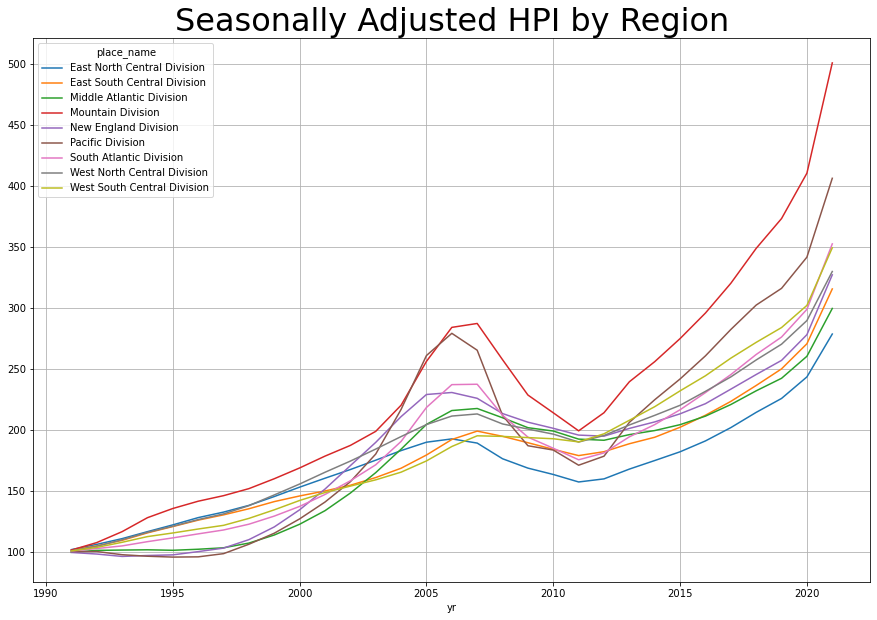

In [10]:
region_hdf.plot(figsize=(15,10))
plt.grid()
#For monthly frequency HPI values
plt.title('Seasonally Adjusted HPI by Region',fontsize=32)

# Analysis
Based on the graphs and tables displayed from the data, it seems that the mountain division has the highest HPI values compared to other regions, and the HPI values have been increasing overall for all regions since the 1990s. There could also be a correlation between geographical location and HPI values which can be further explored.